In [7]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [8]:
rnd = np.random
rnd.seed(1)

In [9]:
end_time = 60 * 8
fel = [{'Type': 'Llegada', 't': st.expon.ppf(rnd.rand(), loc=0, scale=3)}]
clock = 0
Q = 0
Cajero = 0
Cliente = 0
lq = [(0, 0, 0, 0, 0)]
Tiempo_espera = [(0, 0)]

In [10]:
while clock <= end_time:
    fel = sorted(fel, key=lambda e: e['t'])
    current_event = fel.pop(0)

    previous_q = Q
    previous_clock = clock

    clock = current_event['t']

    if current_event['Type'] == 'Llegada':
        Cliente += 1
        if Cajero == 0:
            Cajero = 1
            fel.append({'Type': 'Atencion', 't': clock + st.expon.ppf(rnd.rand(), loc=0, scale=2)})

        else:
            Q += 1

        fel.append({'Type': 'Llegada', 't': clock + st.expon.ppf(rnd.rand(), loc=0, scale=3)})


    elif current_event['Type'] == 'Atencion':
        if Q > 0:
            Q -= 1
            Cajero = 1
            fel.append({'Type': 'Atencion', 't': clock + st.expon.ppf(rnd.rand(), loc=0, scale=2)})

        else:
            Cajero = 0

    lq.append((clock, Q, previous_clock, clock - previous_clock, previous_q))
    Tiempo_espera.append(())

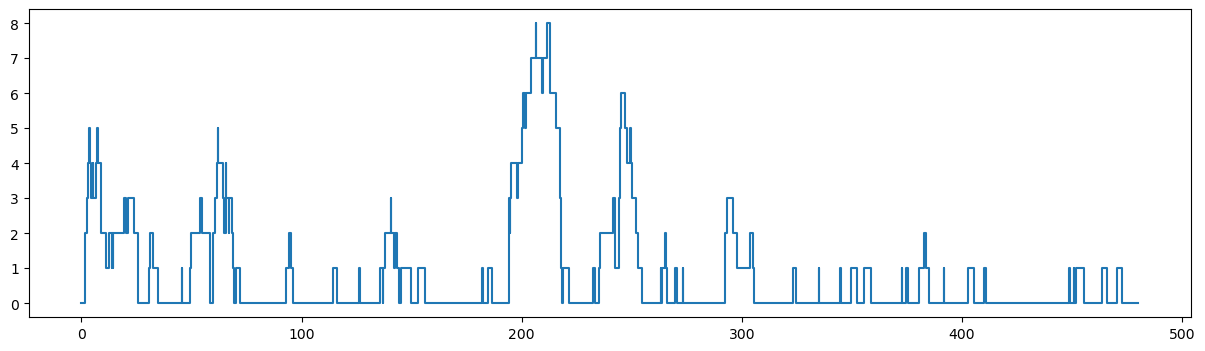

In [11]:
plt.figure(figsize=(15, 4))
plt.step([v[0] for v in lq], [v[1] for v in lq])

In [12]:
sum(e[3]*e[4] for e in lq)/end_time

0.8212137034143582